# EV Car Prices

This assignment focuses on car prices. The data ('car_prices.xlsx') is a pre-processed version of original data scraped from bilbasen.dk by previous MAL1 students. The dataset contains 16 columns:

- **Price (DKK)**: The current listed price of the vehicle in Danish Kroner.
- **Model Year**: The manufacturing year of the vehicle.
- **Mileage (km)**: The total kilometres driven by the vehicle (odometer reading).
- **Electric Range (km)**: The estimated maximum driving range on a full charge.
- **Battery Capacity (kWh)**: The total capacity of the vehicle's battery in kilowatt-hours.
- **Energy Consumption (Wh/km)**: The vehicle's energy consumption in watt-hours per kilometre.
- **Annual Road Tax (DKK)**: The annual road tax cost in Danish Kroner.
- **Horsepower (bhp)**: The vehicle's horsepower (brake horsepower).
- **0-100 km/h (s)**: The time (in seconds) for the car to accelerate from 0 to 100 km/h.
- **Top Speed (km/h)**: The maximum speed the vehicle can achieve.
- **Towing Capacity (kg)**: The maximum weight the vehicle can tow.
- **Original Price (DKK)**: The price of the vehicle when first sold as new.
- **Number of Doors**: The total number of doors on the vehicle.
- **Rear-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for rear-wheel drive.
- **All-Wheel Drive (AWD)**: A binary indicator (1 = Yes, 0 = No) for all-wheel drive.
- **Front-Wheel Drive**: A binary indicator (1 = Yes, 0 = No) for front-wheel drive.

The first one, **Price**, is the response variable.

The **objective** of this assignment is:
1. Understand how linear algebra is used in Machine Learning, specifically for correlations and regression
2. Learn how to perform multiple linear regression, ridge regression, lasso regression and elastic net
3. Learn how to assess regression models

Please solve the tasks using this notebook as you template, i.e. insert code blocks and markdown blocks to this notebook and hand it in. Please use 42 as your random seed.


## Import data
 - Import the dataset 
 - Split the data in a training set and test set - make sure you extract the response variable
 - Remember to use the data appropriately; in the tasks below, we do not explicitly state when to use train and test - but in order to compare the models, you must use the same dataset for training and testing in all models.
 - Output: When you are done with this, you should have the following sets: `X` (the original dataset), `X_train`, `X_train`, `X_test`, `y_train`, `y_test`

In [101]:
# Code block for important and creating data sets. Add more code blocks if needed.
import pandas as pd
X = pd.read_excel('car_prices.xlsx') # a original dataset
X = X.dropna() # drop nan just in case
X 

,Price (DKK),Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
0,199900,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,0,1
1,455555,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,1,0
2,309900,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,0,1
3,425362,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0,0
4,749900,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,414000,2023,12000,514,70.0,173,780,534,3.7,250,1600,452216,5,0,1,0
6222,289000,2021,90000,469,78.0,193,780,408,4.7,210,1500,395420,5,0,1,0
6223,385000,2023,11000,450,66.0,170,780,286,6.0,190,1600,475675,5,1,0,0
6224,109900,2017,90000,280,28.0,115,780,120,9.9,165,1000,279994,5,0,0,1


In [102]:
y = X["Price (DKK)"] # the variable or "label" of this assignment
# IT MUST MATCH THE COLUMN TITLE NAME (check on excel file) 
y

0       199900
1       455555
2       309900
3       425362
4       749900
         ...  
6221    414000
6222    289000
6223    385000
6224    109900
6225    169000
Name: Price (DKK), Length: 6226, dtype: int64

In [103]:
X = X.drop(["Price (DKK)"], axis='columns') # drop price column after set the car price on y
X 

,Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
0,2024,3000,270,39.0,168,780,147,7.9,144,1000,250720,5,0,0,1
1,2024,1001,536,82.0,177,780,408,4.9,180,1800,462900,5,0,1,0
2,2024,4000,460,64.8,162,780,204,7.8,167,750,345620,5,0,0,1
3,2024,10,550,76.6,153,780,286,6.7,180,1000,395615,5,1,0,0
4,2024,0,505,99.8,228,780,384,5.3,200,2500,745520,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6221,2023,12000,514,70.0,173,780,534,3.7,250,1600,452216,5,0,1,0
6222,2021,90000,469,78.0,193,780,408,4.7,210,1500,395420,5,0,1,0
6223,2023,11000,450,66.0,170,780,286,6.0,190,1600,475675,5,1,0,0
6224,2017,90000,280,28.0,115,780,120,9.9,165,1000,279994,5,0,0,1


In [104]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_test # check

,Model Year,Mileage (km),Electric Range (km),Battery Capacity (kWh),Energy Consumption (Wh/km),Annual Road Tax (DKK),Horsepower (bhp),0-100 km/h (s),Top Speed (km/h),Towing Capacity (kg),Original Price (DKK),Number of Doors,Rear-Wheel Drive,All-Wheel Drive (AWD),Front-Wheel Drive
239,2023,0,524,96.1,203,780,625,3.5,220,750,1203018,4,0,1,0
1119,2023,8000,429,64.8,174,780,313,5.7,180,1200,591941,5,0,1,0
2215,2022,48000,584,80.7,163,780,340,5.6,190,750,475721,5,1,0,0
2500,2020,35000,424,86.5,232,920,408,5.7,200,1800,803009,5,0,1,0
5783,2023,15000,419,95.0,233,780,408,5.7,200,1800,685214,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,2023,30000,491,60.0,144,780,283,6.1,225,1000,325710,4,1,0,0
1025,2023,6000,484,64.0,147,780,204,7.9,167,300,325815,5,0,0,1
1614,2024,10,435,64.0,166,780,204,8.0,160,500,240619,5,1,0,0
5153,2023,9000,510,76.6,172,780,299,6.3,180,1200,465719,5,0,1,0


## Part 1: Linear Algebra
In this assignment, you have to solve all problems using linear algebra concepts. You are free to use SymPy or NumPy - though NumPy is **significantly** more efficient computationally than SymPy since NumPy is optimized for numerical computations with floating-point arithmetic. Since linear regression is purely numerical, NumPy is the better choice.

Implement all the steps from the note "Linear_regression.pdf", i.e.

- Setup the normal equation and find the coefficient vector
- Find the predicted values and use these to determine the MSE and $R^2$
- Interpret the results





In [105]:
# Code block for Part 1. Add more code blocks if needed.
import numpy as np 

X_train.insert(0, 'something', 1) # insert a column of 1

# setup the normal equation
# (X^T * X)^-1 
X_train_transposed = np.transpose(X_train)
X_train_transposed_times_X_train = X_train_transposed @ X_train # numby use "@", sympy use "*" (and AB != BA for matrix)
# use np.linalg.pinv instead of np.linalg.inv to avoid singular matrix error and garbage values (which ruins the r^2 score)
X_train_transposed_times_X_train_inversed = np.linalg.pinv(X_train_transposed_times_X_train) 
# X^T * y
X_train_transposed_times_y = X_train_transposed @ y_train
X_train_transposed_times_y
# B = (X^T * X)^-1 * X^T * y
B = X_train_transposed_times_X_train_inversed @ X_train_transposed_times_y
B


array([-7.60989394e-01,  7.19112298e+01, -1.21357928e+00,  2.09557799e+02,
        2.94950867e+01,  3.11165840e+02, -4.24531271e+02, -2.04132747e+01,
        4.06304924e+03,  1.92571354e+02,  2.57020754e+01,  7.26956423e-01,
        1.15962706e+02,  9.65604322e+03, -7.79276708e+03, -1.86403713e+03])

In [106]:
X_test.insert(0, 'something', 1) # insert a column of 1 to X_test as well
y_hat_test = X_test @ B

n_test = len(y_test)
mse_test = (1/n_test) * np.sum((y_test - y_hat_test)**2)

y_mean_test = np.mean(y_test)
sst_test = np.sum((y_test - y_mean_test)**2)
ssr_test = np.sum((y_test - y_hat_test)**2)
r_squared_test = 1 - (ssr_test / sst_test)

print(f"Test MSE: {mse_test}")
print(f"Test R^2: {r_squared_test}")

Test MSE: 3032238857.4664745
Test R^2: 0.8518315469603457


### Result interpitation
$R^2 = 0.852...$: so it's mean overfitting, it will doesn't fully follows the data, but it understand its pattern.

# Part 2: Using Library Functions

### Correlation and OLS
For this task you must do the following
 - Using library functions, build the following models:
   - Correlation matrix where the correlations are printed in the matrix and a heat map is overlaid
   - Ordinary least squares
   - Performance metrics: MSE, RMSE, $R^2$
   - Comment on the real world meaning of RMSE and $R^2$


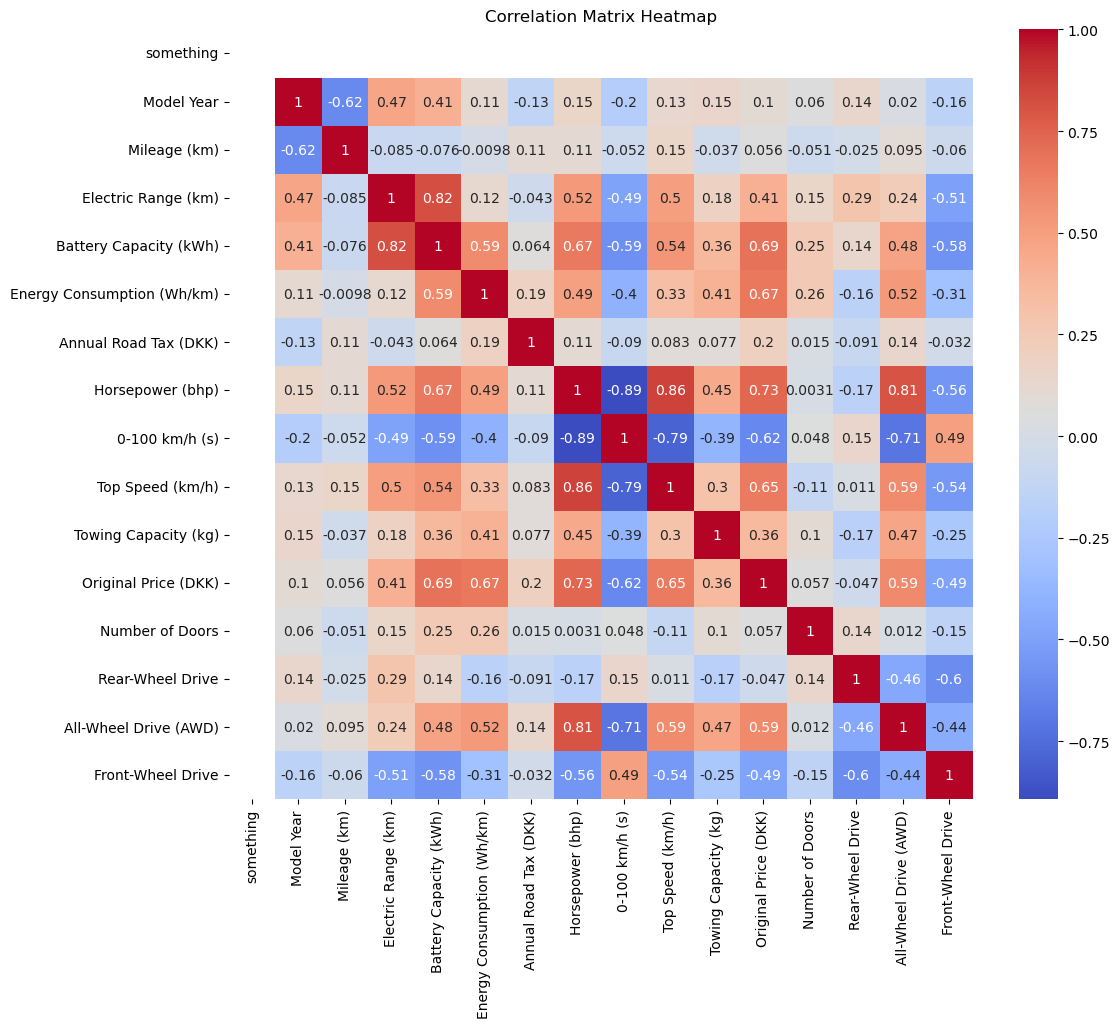

OLS(B) = [ 0.00000000e+00  1.80782240e+04 -6.25169798e-01  1.06824338e+02
  3.80748250e+01  1.11477528e+02 -3.46980312e+02  2.44953522e+01
  6.48326657e+03  1.45706666e+02  2.00274162e+01  7.38056289e-01
  2.87185272e+03  7.87050729e+03 -4.67564631e+03 -3.19486098e+03]
MSE = 2774486707.5852094
RMSE = 52673.39658295456
R^2 = 0.8644264443647875


In [107]:
# Use this for Correlation and OLS. Add more code blocks if needed.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix using pandas
corr_matrix = X_test.corr() 

# Set up the matplotlib figure size
plt.figure(figsize=(12, 10))

# Draw the heatmap
# annot=True is what "prints the correlations in the matrix"
# cmap= color overlay
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation Matrix Heatmap")
plt.show()

ols = LinearRegression()
ols.fit(X_train, y_train)

y_hat_test_ols = ols.predict(X_test)
mse_test = mean_squared_error(y_test, y_hat_test_ols)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test, y_hat_test_ols)

print(f"OLS(B) = {ols.coef_}")
print(f"MSE = {mse_test}")
print(f"RMSE = {rmse_test}")
print(f"R^2 = {r_squared_test}")

RMSE is consider as standard deviation of residuals, which in this case is tell us how far apart of car price prediction from true value on average. It means that on average, this model predicted car price is off by about 55000 kr from the actual selling price.

$R^2$ tell us the percentage of the price differences that your model can successfully explain given the features we gave it (mileage, year, horsepower)

$R^2 = 0.86$ means that the model knows about 86% why the cars is more pricy than the other, the other 14% is caused by the factor that data doesn't include e.g. the color, if it's no longer produced, etc.

### Ridge, Lasso and Elastic Net
In order for Ridge and Lasso (and Elastic net) to have an effect, you must use scaled data to build the models, since regularization depends on coefficient magnitude, and if using non-scaled data the penalty will affect them unequally. Feel free to use this code to scale the data:

```python
# Standardize X
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Standardize y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()
```
For this task you must do the following:
   - Ridge regression (using multiple alphas)
   - Lasso regression (using multiple alphas)
   - Elastic Net (using multiple alphas)
 - Discussion and conclusion:
   - Discuss the MSE and $R^2$ of all 3 models and conclude which model has the best performance - note the MSE will be scaled!
   - Rebuild the OLS model from Task 4, but this time use the scaled data from this task - interpret the meaning of the model's coefficients
   - Use the coefficients of the best ridge and lasso model to print the 5 most important features and compare to the 5 most important features in the OLS with scaled data model. Do the models agree about which features are the most important?

Note: You may get a convergence warning; try increasing the `max_iter` parameter of the model (the default is 1000 - maybe set it to 100000)

**NOTE (Can)**: OLS is linear regression model by minimizing the sum of squared residuals. and it's use for machine learning as basic linear regression

In [108]:
# Use this for Ridge, Lasso and Elastic Net. Add more code blocks if needed.
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler_X = StandardScaler()
# learn + apply | use for training data, and use the same scaler for test data
X_train_scaled = scaler_X.fit_transform(X_train) 
# apply only | use for test data, and the same scaler for, do not fit again
X_test_scaled = scaler_X.transform(X_test) 

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1,1)).flatten()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1,1)).flatten()


In [109]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

alphas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 100.0]

print("ridge w/ different alphas list")
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    ridge.fit(X_train_scaled, y_train_scaled) 
    y_pred = ridge.predict(X_test_scaled)
    # since x has many columns, it's better to print the results in a table format, rather than plot in the graph
    print(f"Alpha: {alpha:5} | MSE: {mean_squared_error(y_test_scaled, y_pred):.4f} | R^2: {r2_score(y_test_scaled, y_pred):.4f}")

print("\nlasso w/ different alphas list")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(X_train_scaled, y_train_scaled)
    y_pred = lasso.predict(X_test_scaled)
    print(f"Alpha: {alpha:5} | MSE: {mean_squared_error(y_test_scaled, y_pred):.4f} | R^2: {r2_score(y_test_scaled, y_pred):.4f}")

print("\nelastic net w/ different alphas list")
for alpha in alphas:
    # l1_ratio=0.5 means an equal mix of Ridge and Lasso penalties
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=100000)
    enet.fit(X_train_scaled, y_train_scaled)
    y_pred = enet.predict(X_test_scaled)
    print(f"Alpha: {alpha:5} | MSE: {mean_squared_error(y_test_scaled, y_pred):.4f} | R^2: {r2_score(y_test_scaled, y_pred):.4f}")


ridge w/ different alphas list
Alpha:  0.01 | MSE: 0.1252 | R^2: 0.8644
Alpha:   0.1 | MSE: 0.1252 | R^2: 0.8644
Alpha:   0.5 | MSE: 0.1252 | R^2: 0.8644
Alpha:   1.0 | MSE: 0.1252 | R^2: 0.8644
Alpha:   5.0 | MSE: 0.1252 | R^2: 0.8644
Alpha:  10.0 | MSE: 0.1253 | R^2: 0.8643
Alpha: 100.0 | MSE: 0.1266 | R^2: 0.8629

lasso w/ different alphas list
Alpha:  0.01 | MSE: 0.1229 | R^2: 0.8669
Alpha:   0.1 | MSE: 0.1489 | R^2: 0.8388
Alpha:   0.5 | MSE: 0.4343 | R^2: 0.5297
Alpha:   1.0 | MSE: 0.9241 | R^2: -0.0008
Alpha:   5.0 | MSE: 0.9241 | R^2: -0.0008
Alpha:  10.0 | MSE: 0.9241 | R^2: -0.0008
Alpha: 100.0 | MSE: 0.9241 | R^2: -0.0008

elastic net w/ different alphas list
Alpha:  0.01 | MSE: 0.1238 | R^2: 0.8659
Alpha:   0.1 | MSE: 0.1355 | R^2: 0.8533
Alpha:   0.5 | MSE: 0.2973 | R^2: 0.6780
Alpha:   1.0 | MSE: 0.5661 | R^2: 0.3869
Alpha:   5.0 | MSE: 0.9241 | R^2: -0.0008
Alpha:  10.0 | MSE: 0.9241 | R^2: -0.0008
Alpha: 100.0 | MSE: 0.9241 | R^2: -0.0008


#### Ridge
- the MSE of **Ridge** is increases slowly with low rate of change as $\alpha$ is increase
- the $R^2$ of **Ridge** is decreases slowly with low rate of change as $\alpha$ is increase
#### Lasso
- the MSE of **Lasso** is increases with high of change when $\alpha=0.5$ and it likely converges to $0.9241$
- the $R^2$ of **Ridge** is decreases with high of change when $\alpha=0.5$ and it likely converges to $-0.0008$
#### Elastic net
- the MSE of **Elastic net** (with equally mix of Ridge and Lasso) is increases with high of change when $\alpha=1$ with like to converge when $MSE=0.9241$
- the $R^2$ of **Elastic net** is decreases with high of change when $\alpha=1$ and it likely converges to $-0.0008$

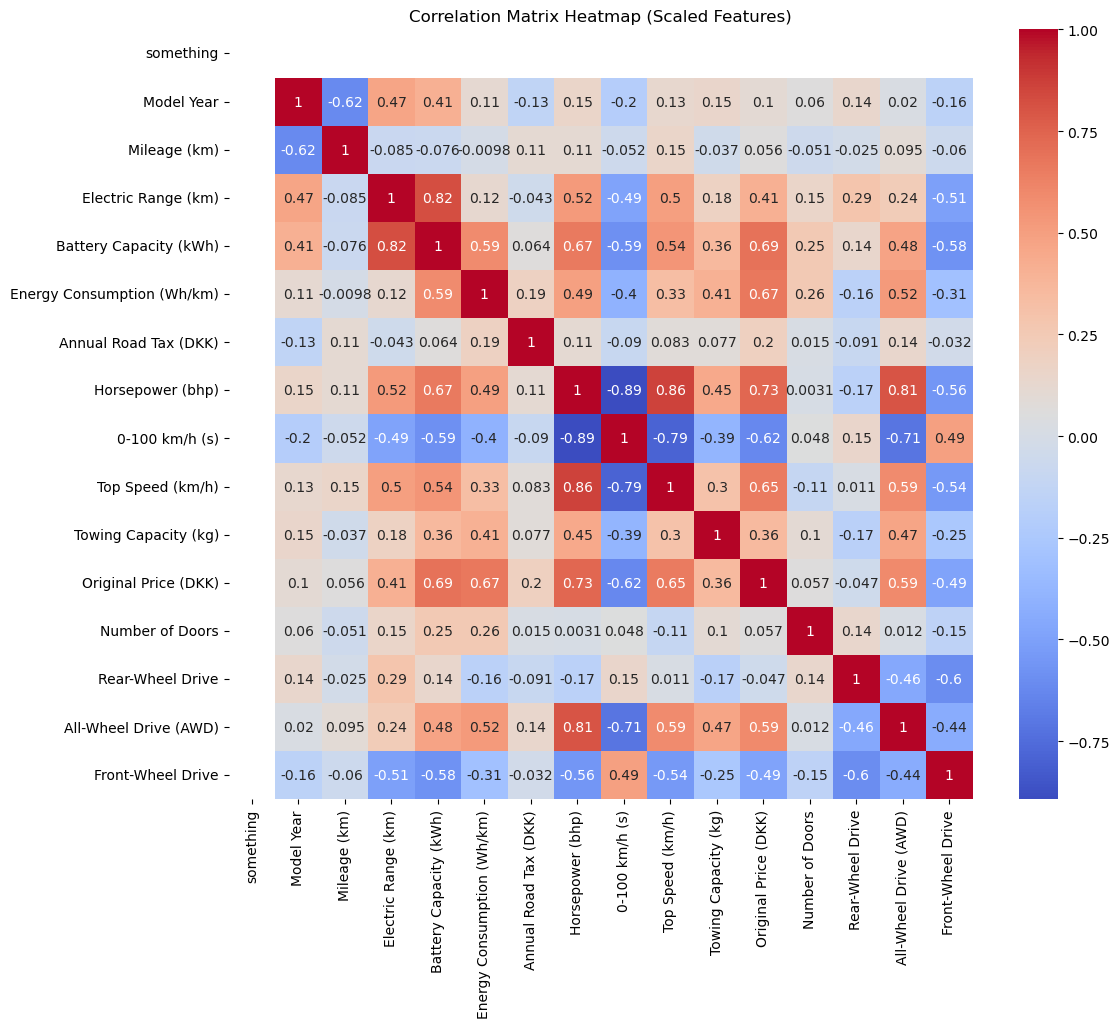

Scaled OLS MSE:  0.1252
Scaled OLS RMSE: 0.3538
Scaled OLS R^2:  0.8644

Top 5 most important features (scaled OLS):
                 Feature  Coefficient
11  Original Price (DKK)     0.850039
1             Model Year     0.167978
8         0-100 km/h (s)     0.077022
3    Electric Range (km)     0.070606
10  Towing Capacity (kg)     0.047491


In [110]:
# Convert scaled arrays -> DataFrames so .corr() works
feature_names = X_train.columns  # assumes same columns as before scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

# Correlation heatmap (scaled X)
corr_matrix = X_test_scaled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (Scaled Features)")
plt.show()

# OLS on scaled data
ols_scaled = LinearRegression()
ols_scaled.fit(X_train_scaled_df, y_train_scaled)

y_pred_scaled = ols_scaled.predict(X_test_scaled_df)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = mse_scaled ** 0.5
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print(f"Scaled OLS MSE:  {mse_scaled:.4f}")
print(f"Scaled OLS RMSE: {rmse_scaled:.4f}")
print(f"Scaled OLS R^2:  {r2_scaled:.4f}")

# Coefficients (standardized betas)
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": ols_scaled.coef_
}).sort_values("Coefficient", ascending=False)

print("\nTop 5 most important features (scaled OLS):")
print(coef_df.head(5)[["Feature", "Coefficient"]])

***Can's take***: According to the column(y) and the chosen data (car price) it's make sense that the model can **predict the Original Price pretty well.**

## Part 3: Classification

### kNN Classifier
In this final task, we go from a regression to a classification problem. Your goal is to classify cars as either **"Cheap"** or **"Expensive"** using the k-Nearest Neighbors (kNN) algorithm.

For this task you must do the following:
- **Prepare the Target Variable**:
   - Calculate the **median** of the original `Price (DKK)` column.
   - Create a new binary target variable, where:
     - `1` (Expensive) if the price is above the median.
     - `0` (Cheap) if the price is at or below the median.
- **Train-Test Split**
- **Feature Scaling**: Use the standardized (scaled) data from Task 5.
- **Model Implementation**:
   - Build a kNN classifier using `sklearn.neighbors.KNeighborsClassifier`.
   - Experiment with at least five different values for $k$ and at least 3 different distance metrics.
- **Evaluation**:
   - Find the best combination of $k$ and distance metric - the one that gives the highest accuracy score.
   - **Discussion**: Explain the trade-off of choosing a very small $k$ versus a very large $k$. Which value performed best for this dataset?

In [111]:
# Use this for Part 3. Add more code blocks if needed.
# Prepare the target variable (median price and boolean target variable)
median_price = y.median()
print(f"Median Price: {median_price}")
y_is_expensive_train = (y_train > median_price).astype(int)
y_is_expensive_test = (y_test > median_price).astype(int)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_train_scaled, y_is_expensive_train, test_size=0.2, random_state=42, stratify=y_is_expensive_train
)

Median Price: 304900.0


In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define a range of k values to test
neighbors_range = range(1, 21)
distance_metrics = ['euclidean', 'manhattan', 'minkowski']  # Common distance metrics, only illustration

# Variables to store the best parameters and highest accuracy
best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        # Initialize the KNN model with current hyperparameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        knn.fit(X_train_knn, y_train_knn) # Train the model
        y_pred_knn = knn.predict(X_test_knn) # Make predictions on the test set
        accuracy = accuracy_score(y_test_knn, y_pred_knn) # Calculate accuracy
        
        print(f"k: {n_neighbors}, Metric: {metric}, Accuracy: {accuracy:.4f}") 
        
        # Update the best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")


k: 1, Metric: euclidean, Accuracy: 0.9327
k: 1, Metric: manhattan, Accuracy: 0.9388
k: 1, Metric: minkowski, Accuracy: 0.9327
k: 2, Metric: euclidean, Accuracy: 0.9317
k: 2, Metric: manhattan, Accuracy: 0.9367
k: 2, Metric: minkowski, Accuracy: 0.9317
k: 3, Metric: euclidean, Accuracy: 0.9468
k: 3, Metric: manhattan, Accuracy: 0.9468
k: 3, Metric: minkowski, Accuracy: 0.9468
k: 4, Metric: euclidean, Accuracy: 0.9398
k: 4, Metric: manhattan, Accuracy: 0.9418
k: 4, Metric: minkowski, Accuracy: 0.9398
k: 5, Metric: euclidean, Accuracy: 0.9408
k: 5, Metric: manhattan, Accuracy: 0.9428
k: 5, Metric: minkowski, Accuracy: 0.9408
k: 6, Metric: euclidean, Accuracy: 0.9357
k: 6, Metric: manhattan, Accuracy: 0.9388
k: 6, Metric: minkowski, Accuracy: 0.9357
k: 7, Metric: euclidean, Accuracy: 0.9388
k: 7, Metric: manhattan, Accuracy: 0.9428
k: 7, Metric: minkowski, Accuracy: 0.9388
k: 8, Metric: euclidean, Accuracy: 0.9347
k: 8, Metric: manhattan, Accuracy: 0.9398
k: 8, Metric: minkowski, Accuracy:

#### **My take:** 
- Highest Accuracy is when $k=3$ for all 3 distance metrics (euclidean, manhattan, minkowski)
- For this case accurary is start high until it reachs $k=3$, then starts to drop when $k$ is higher

#### Small $k$ 
- has **flexible decision boundary**, it captures fine detail
- but it sensitive to **outliers/noise**, can **overfit**

#### Large $k$
- has more **stable predictions**, less noise sensitivity, smoother boundaries
- but it has **high bias**, can **underfit**